In [40]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
user_reviews_df = pd.read_csv("../../datset/CA_user_reviews.csv")

In [13]:
user_reviews_df['elite']

0                         NaN
1         2013,2014,2015,2018
2         2013,2014,2015,2018
3         2013,2014,2015,2018
4         2013,2014,2015,2018
                 ...         
348850                    NaN
348851                    NaN
348852                    NaN
348853                    NaN
348854                    NaN
Name: elite, Length: 348855, dtype: object

In [59]:
reviews_per_user = user_reviews_df.groupby('user_id')

In [62]:
reviews_per_user.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_years_count,friend_count
0,0,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1.0,1.0,0.0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33,...,0,0,0,0,0,0,0,0,0,0
1,1,9ag-bC-521T1i3IypXr4Ug,sx_cqxyWRUoOIoy_AXmLdQ,B5XSoSG3SfvQGtKEGQ1tSQ,4.0,1.0,0.0,0.0,I work with a college group that does camping ...,2013-09-07 21:16:36,...,0,0,9,12,11,11,11,0,4,698
2,2,SP736Ciz9njLZiwZCR3QnQ,sx_cqxyWRUoOIoy_AXmLdQ,5bDjg02rlg6ODEUT-UQT-A,3.0,3.0,1.0,1.0,Was hoping for a lot more! Got the filet migno...,2013-08-17 00:28:53,...,0,0,9,12,11,11,11,0,4,698
3,3,mGuEEBKBvxasUCkd59v1dg,sx_cqxyWRUoOIoy_AXmLdQ,_QohBRBxWuwlIUuHj5_fZQ,3.0,1.0,0.0,1.0,"I mean, you can't beat the views, that much is...",2013-08-17 00:35:27,...,0,0,9,12,11,11,11,0,4,698
4,4,fYSB2HqxJqEGUJh2eka9KA,sx_cqxyWRUoOIoy_AXmLdQ,yPSejq3_erxo9zdVYTBnZA,5.0,0.0,0.0,0.0,One of my favorite spots when visiting Santa B...,2013-08-17 00:37:43,...,0,0,9,12,11,11,11,0,4,698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348850,348850,g7q22jHG6Vi6ANDuBCThWQ,P7U5QFaP3JkJ7KbE2FgzUg,z-dnUiZVUWnDyZgqGVHCEw,5.0,1.0,0.0,0.0,Stop by here all the time. Awsome customer se...,2016-08-30 19:51:48,...,0,0,0,0,0,0,0,0,0,0
348851,348851,FtFJU5Avz7wzlqLYquZcvg,g48tDWwqDw-SQfaCPJDZUw,z-dnUiZVUWnDyZgqGVHCEw,1.0,0.0,0.0,0.0,These guys falsely advertised and stole money ...,2021-03-24 21:44:27,...,0,0,0,0,0,0,0,0,0,0
348852,348852,cKuP5pnvbvpn4UbaccVcdg,OVYb1El25BgVhgbXb4e-KA,XPkkWyAkkPeH-PqXmBMmpg,5.0,0.0,0.0,0.0,Great experience with great people who are rea...,2021-06-22 21:41:07,...,0,0,0,0,0,0,0,0,0,0
348853,348853,dZC87sZ1f2ntOf876_DDLg,9w5PoliouEyNikdy6DizqQ,XPkkWyAkkPeH-PqXmBMmpg,5.0,0.0,0.0,0.0,I spent the week in Santa Barbara and had the ...,2021-06-28 23:53:44,...,0,0,2,2,0,0,0,0,0,72


In [63]:
# bar graph with line overaly

corr_funny_stars, _ = spearmanr(reviews_per_user['funny_x'], reviews_per_user['stars_x'])
corr_useful_stars, _ = spearmanr(reviews_per_user['useful_x'], reviews_per_user['stars_x'])
corr_cool_stars, _ = spearmanr(reviews_per_user['cool_x'], reviews_per_user['stars_x'])

print(f"Spearman's correlation between funny votes and stars: {corr_funny_stars:.3f}")
print(f"Spearman's correlation between useful votes and stars: {corr_useful_stars:.3f}")
print(f"Spearman's correlation between cool votes and stars: {corr_cool_stars:.3f}")

# Scatter plot for stars vs funny
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter( reviews_per_user['stars_x'], reviews_per_user['funny_x'],alpha=0.5)
plt.title('Stars vs Funny Votes')
plt.xlabel('Funny Votes')
plt.ylabel('Stars')

# Scatter plot for stars vs useful
plt.subplot(1, 3, 2)
plt.scatter( reviews_per_user['stars_x'], reviews_per_user['useful_x'],alpha=0.5)
plt.title('Stars vs Useful Votes')
plt.xlabel('Useful Votes')

# Scatter plot for stars vs cool
plt.subplot(1, 3, 3)
plt.scatter(reviews_per_user['stars_x'], reviews_per_user['cool_x'], alpha=0.5)
plt.title('Stars vs Cool Votes')
plt.xlabel('Cool Votes')

plt.tight_layout()
plt.show()


Spearman's correlation between the number of reviews and average score: -0.075


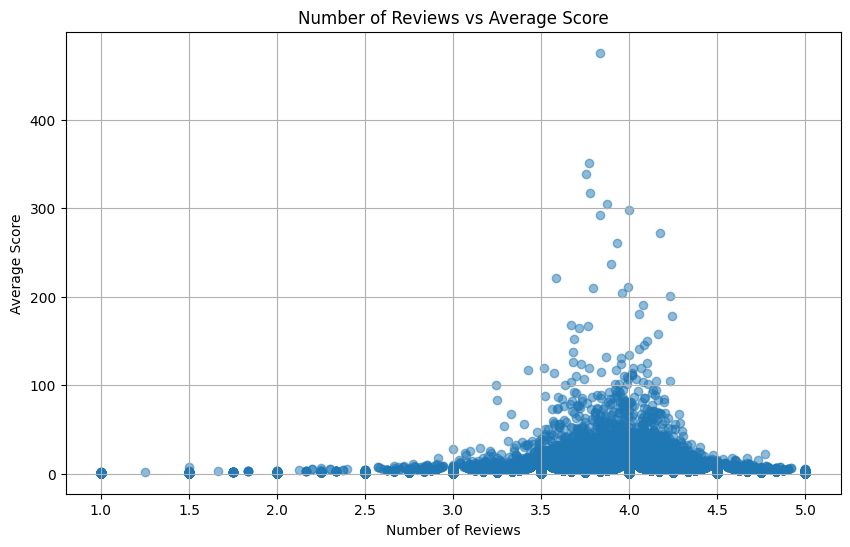

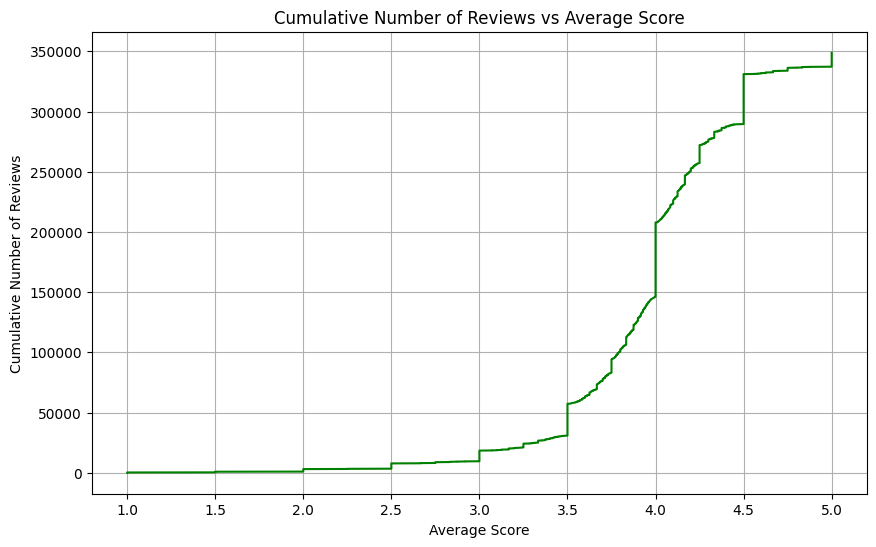

/var/folders/xj/fy4wdhd12cv0fsrwvy9zgk680000gn/T/ipykernel_26723/2966000328.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = user_stats.groupby(bins)['num_reviews'].mean()


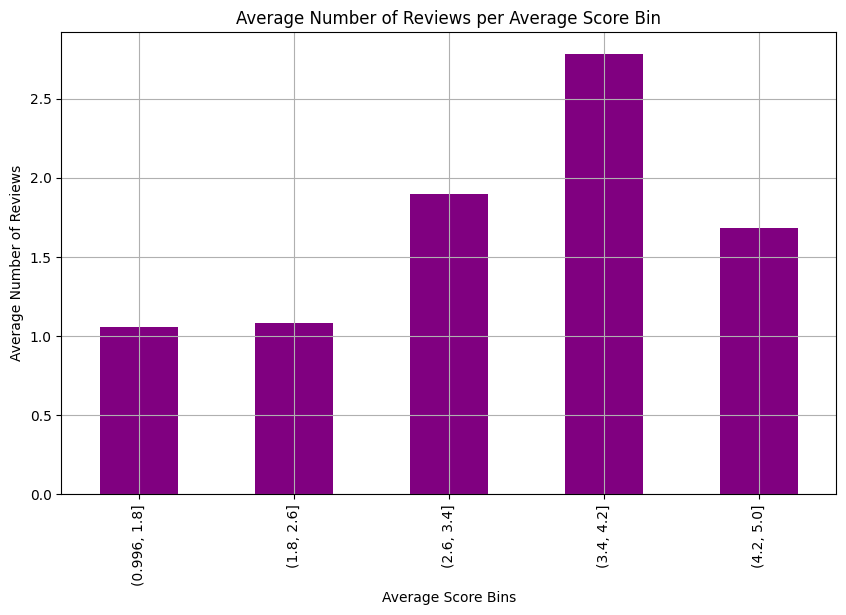

In [ ]:
# Turn into histogram, line graph, bar gragh
# add line


# Step 1: Aggregate data to count the number of reviews per user
reviews_per_user = user_reviews_df.groupby('user_id').size()

# Step 2: Calculate the average score per user
average_score_per_user = user_reviews_df.groupby('user_id')['stars_y'].mean()

# Combine the two series into a single DataFrame
user_stats = pd.DataFrame({
    'num_reviews': reviews_per_user,
    'average_score': average_score_per_user
})

# Step 3: Calculate Spearman's correlation
correlation, _ = spearmanr(user_stats['num_reviews'], user_stats['average_score'])
print(f"Spearman's correlation between the number of reviews and average score: {correlation:.3f}")

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_stats['average_score'],user_stats['num_reviews'], alpha=0.5)
plt.title('Number of Reviews vs Average Score')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

# Line Graph
# For a meaningful line graph, let's plot cumulative counts of reviews
plt.figure(figsize=(10, 6))
user_stats_sorted = user_stats.sort_values('average_score')
plt.plot(user_stats_sorted['average_score'], user_stats_sorted['num_reviews'].cumsum(), color='green')
plt.title('Cumulative Number of Reviews vs Average Score')
plt.xlabel('Average Score')
plt.ylabel('Cumulative Number of Reviews')
plt.grid(True)
plt.show()

# Bar Graph
# We can bin the average scores and show the average number of reviews in each bin
plt.figure(figsize=(10, 6))
bins = pd.cut(user_stats['average_score'], bins=5)
grouped = user_stats.groupby(bins)['num_reviews'].mean()
grouped.plot(kind='bar', color='purple')
plt.title('Average Number of Reviews per Average Score Bin')
plt.xlabel('Average Score Bins')
plt.ylabel('Average Number of Reviews')
plt.grid(True)
plt.show()


Spearman's correlation: -0.001


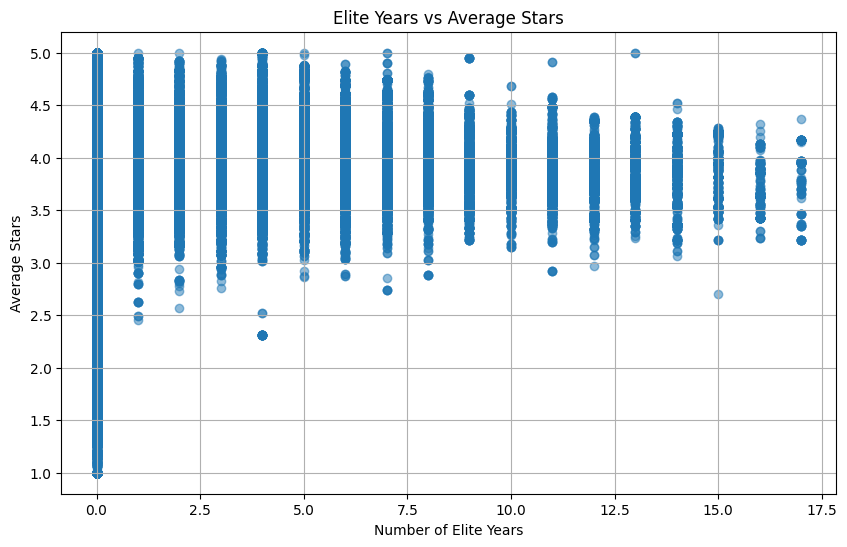

In [ ]:
# Boxplot
# Step 1: Process the 'elite' feature
# Assuming 'elite' is a string of comma-separated years, e.g., "2015,2016,2017"
user_reviews_df['elite_years_count'] = user_reviews_df['elite'].apply(lambda x: len(x.split(',')) if pd.notnull(x) and x != '' else 0)

# Step 2: The average stars per user is already in the 'average_stars' column

# Step 3: Calculate Spearman's correlation
correlation, _ = spearmanr(user_reviews_df['elite_years_count'], user_reviews_df['average_stars'])
print(f"Spearman's correlation: {correlation:.3f}")

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_reviews_df['elite_years_count'], user_reviews_df['average_stars'], alpha=0.5)
plt.title('Elite Years vs Average Stars')
plt.xlabel('Number of Elite Years')
plt.ylabel('Average Stars')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='elite_years_count', y='average_stars', data=user_reviews_df)
plt.title('Boxplot of Average Stars for Each Elite Year Count')
plt.xlabel('Number of Elite Years')
plt.ylabel('Average Stars')
plt.grid(True)
plt.show()


Spearman's correlation between the number of friends and average stars: 0.016


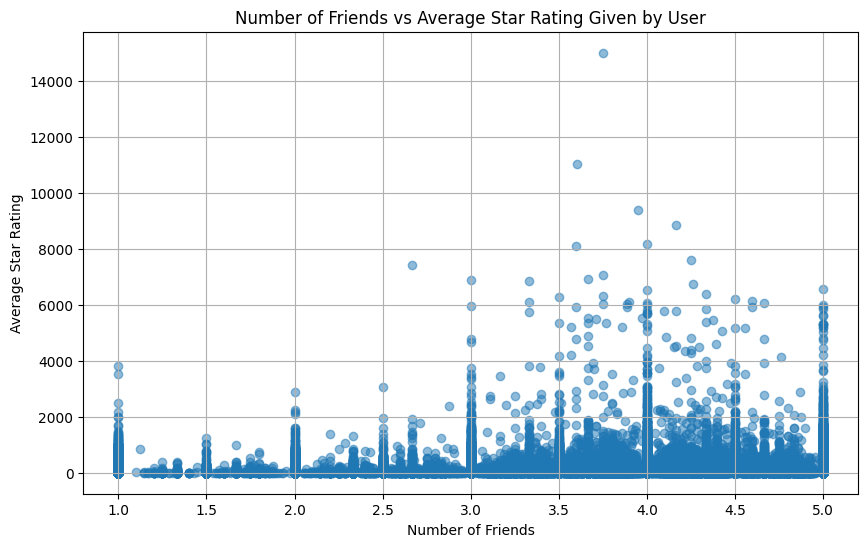

In [ ]:
# linegraph and bargraph
# line overaly
# Step 1: Transform the 'Friends' feature
# Assuming the 'friends' column contains user IDs as strings separated by commas
user_reviews_df['friend_count'] = user_reviews_df['friends'].apply(lambda x: len(x.split(',')) if pd.notna(x) and x != 'None' else 0)

# Step 2: Group by User and Calculate Average Stars
average_stars_per_user = user_reviews_df.groupby('user_id')['stars_x'].mean()

# Combine friend count and average stars into a single DataFrame
user_stats = pd.DataFrame({
    'friend_count': user_reviews_df.groupby('user_id')['friend_count'].first(),  # Assuming the friend count is the same for all rows of the same user
    'average_stars': average_stars_per_user
})

# Step 3: Calculate Spearman's correlation
correlation, _ = spearmanr(user_stats['friend_count'], user_stats['average_stars'])
print(f"Spearman's correlation between the number of friends and average stars: {correlation:.3f}")

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_stats['average_stars'],user_stats['friend_count'],  alpha=0.5)
plt.title('Number of Friends vs Average Star Rating Given by User')
plt.xlabel('Number of Friends')
plt.ylabel('Average Star Rating')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='elite_years_count', y='average_stars', data=user_reviews_df)
plt.title('Boxplot of Average Stars for Each Elite Year Count')
plt.xlabel('Number of Elite Years')
plt.ylabel('Average Stars')
plt.grid(True)
plt.show()
